In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [64]:
train = pd.read_csv("/content/drive/My Drive/AV_Cross_Sell_train.csv")
test = pd.read_csv("/content/drive/My Drive/AV_Cross_Sell_test.csv")
submission = pd.read_csv("/content/drive/My Drive/AV_Cross_Sell_submission.csv")

In [65]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [66]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [67]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Class imbalance problem and we see a lot of customers bailing out of the company which raises the flag that there is something fundamentally wrong with the company.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


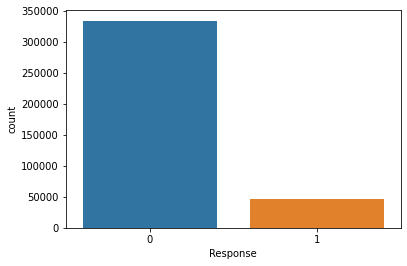

In [68]:
sns.countplot(train['Response'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


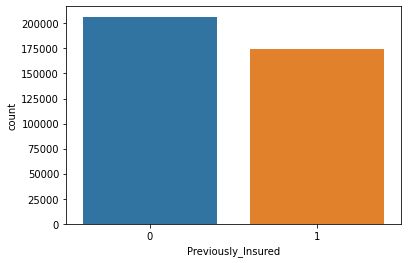

In [69]:
sns.countplot(train['Previously_Insured'])

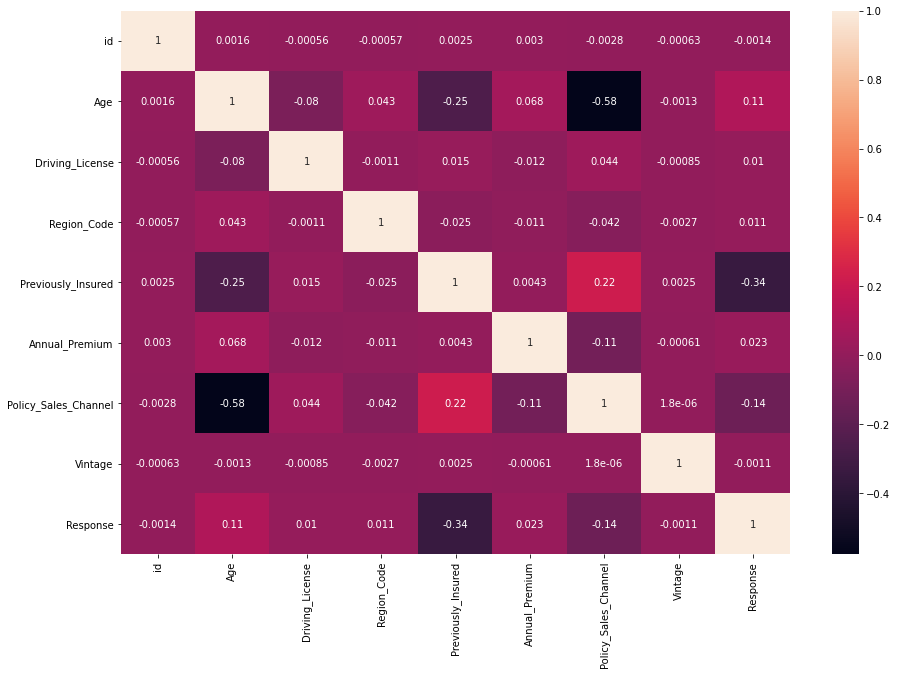

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

There's no influence of the number of days the customer has been in touch with the company. This doesn't have any direct relevance

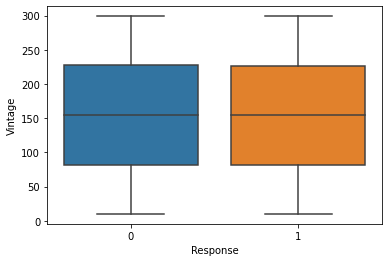

In [71]:
sns.boxplot(x='Response',y='Vintage',data=train)

People who are younger are more likely to discontinue their subscription/insurance with the company as compared to people of middle age.

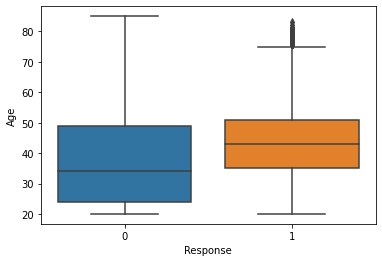

In [72]:
sns.boxplot(x='Response',y='Age',data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


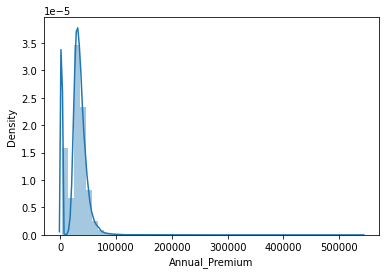

In [73]:
sns.distplot(train['Annual_Premium'])

We see a huge chunk of young people in our data whereas there's a wide distribution in middle and older age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


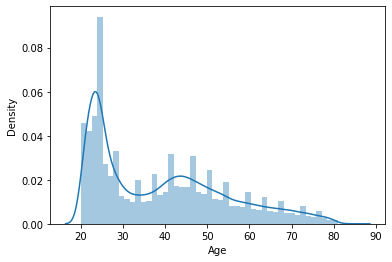

In [74]:
sns.distplot(train['Age'])

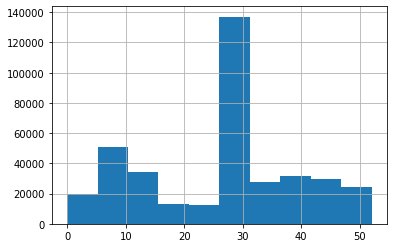

In [75]:
train['Region_Code'].hist()

A lot of customers who were previously insured and even the new ones bailed out in their first shot. Some people who weren't previously insured did decide to go again with the company(12.2%) but extremely few people who were ensured before decided to continue(0.04%). This company has a problem of customer retention.

In [76]:
pd.crosstab(train['Response'],train['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


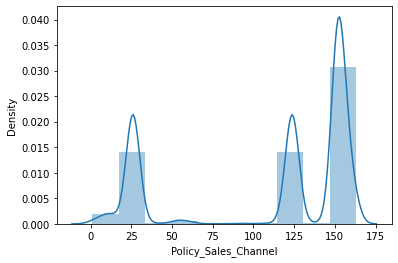

In [77]:
  sns.distplot(train['Policy_Sales_Channel'], bins=10)

In [78]:
def policy_category(x):
  if x > 0 and x < 50:
    return 1
  elif x > 100 and x < 135:
    return 2
  elif x > 135 and x < 176:
    return 3
  else:
    return 0

train['Policy_bins'] = train['Policy_Sales_Channel']
train['Policy_bins'] = train['Policy_bins'].apply(policy_category) 

test['Policy_bins'] = test['Policy_Sales_Channel']
test['Policy_bins'] = test['Policy_bins'].apply(policy_category) 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


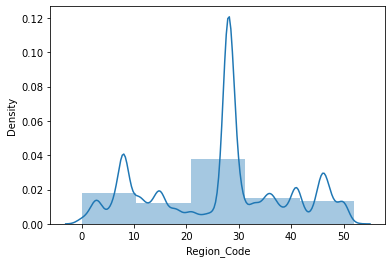

In [79]:
#train['Region_Code'].max()
sns.distplot(train['Region_Code'], bins=5)

In [80]:
def region_category(x):
  if x == 28.0:
    return 1
  elif x == 8.0 or x==46.0 or x==41.0 or x==15.0 or x==30.0 or x==29.0 or x==50.0:
    return 2
  elif x==51.0 or x==44.0 or x==42.0 or x==52.0:
    return 3
  else:
    return 0

train['region_bins'] = train['Region_Code']
train['region_bins'] = train['region_bins'].apply(region_category)

test['region_bins'] = test['Region_Code']
test['region_bins'] = test['region_bins'].apply(region_category)

train['region_bins'].value_counts()

0    154149
2    118696
1    106415
3      1849
Name: region_bins, dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Vehicle_Damage','Vehicle_Age','Gender']
le = LabelEncoder()
train[cat_cols] = train[cat_cols].apply(lambda x: le.fit_transform(x))
test[cat_cols] = test[cat_cols].apply(lambda x: le.fit_transform(x))

2 > years -> 2;
1-2 years -> 0;
< 1 year ->  1

In [82]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_bins,region_bins
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,1,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,3,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,3,2


In [83]:
train['insurance_benefit'] = train['Annual_Premium'] * train['Vehicle_Damage']
train['insurance_benefit_previous'] = train['Annual_Premium'] * train['Previously_Insured']
train['vehicle_age_cust_age'] = train['Age'] / (train['Vehicle_Age'] + 1)
train['premium_per_vehicle_age'] = train['Annual_Premium'] / (train['Vehicle_Age'] + 1)
train['Prem_per_day'] = train['Annual_Premium'] / train['Vintage']

In [84]:
test['insurance_benefit'] = test['Annual_Premium'] * test['Vehicle_Damage']
test['insurance_benefit_previous'] = test['Annual_Premium'] * test['Previously_Insured']
test['vehicle_age_cust_age'] = test['Age'] / (test['Vehicle_Age'] + 1)
test['premium_per_vehicle_age'] = test['Annual_Premium'] / (test['Vehicle_Age'] + 1)
test['Prem_per_day'] = test['Annual_Premium'] / test['Vintage']

In [85]:
import numpy as np
train['Age'] = np.log(train['Age'])
train['Annual_Premium'] = np.log(train['Annual_Premium'])

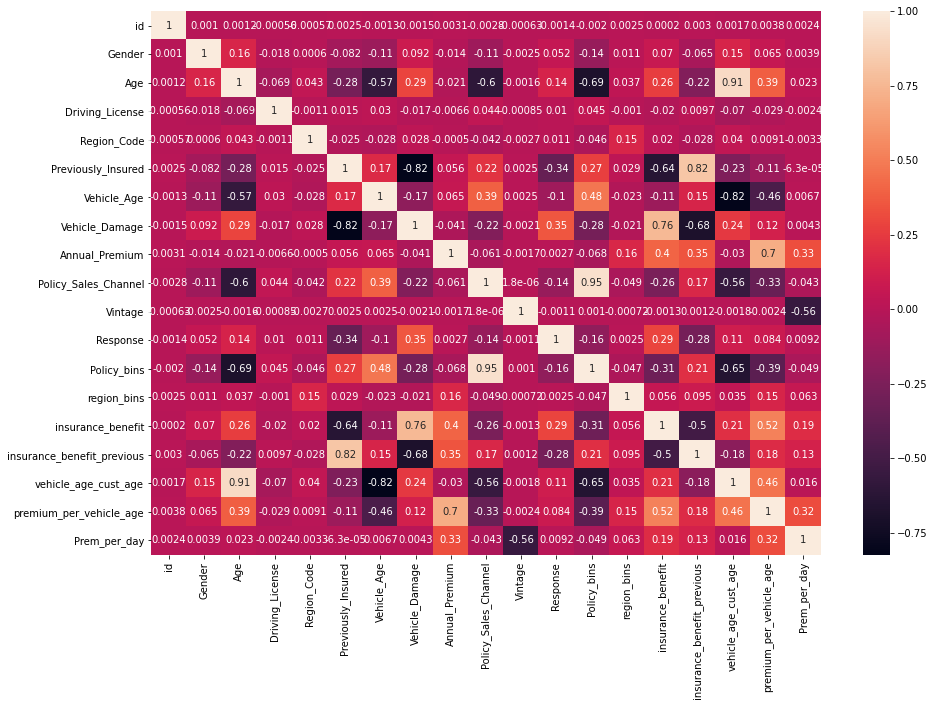

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

In [87]:
cols = ['region_bins','Policy_bins','Previously_Insured','Driving_License']
train = pd.get_dummies(train, columns = cols)
test = pd.get_dummies(test, columns = cols)

In [88]:
X = train.drop(['Response'],axis=1)
y = train['Response']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,shuffle=True,random_state=42)

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_res, target_res = sm.fit_sample(X_train,y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(train_res,target_res)
pred = rfc.predict(X_test)
acc = accuracy_score(y_test, pred)
print(np.round(acc*100, 2), '%')

86.14 %


In [92]:

#from sklearn.ensemble import GradientBoostingClassifier
#gbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
#                                 max_depth = 7, max_features = 'sqrt',subsample=0.8)
#gbc.fit(train_res,target_res)
#pred = gbc.predict(test)
#submission['Response'] = pred

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
lr = DecisionTreeClassifier(max_depth=4)
lr.fit(train_res, target_res)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print(np.round(acc*100, 2), '%')

68.92 %


In [94]:
lr.fit(X,y)
prediction = lr.predict(test)

In [95]:
submission['Response'] = prediction

In [97]:
submission.to_csv('dtc1.csv',index=False)